# Diabetes group exercise
Data from [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Aim: Linear regression of each x against y to find best fit then maybe a PCA to improve model from there.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Load in data

In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(as_frame=True, return_X_y=True)

# Explore data graphically

<AxesSubplot:>

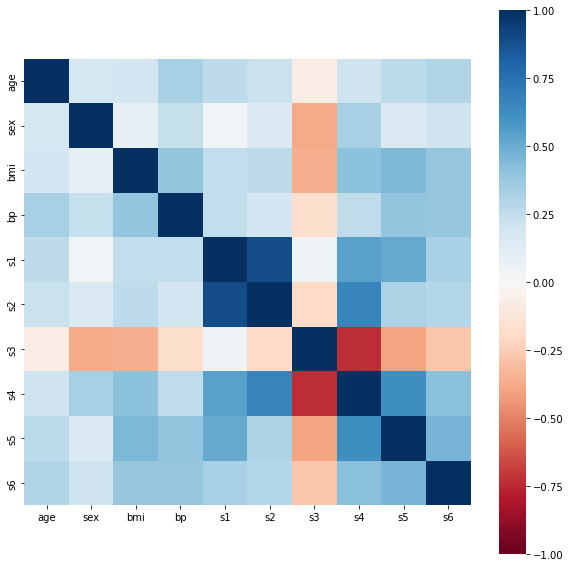

In [3]:
corr=X.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

# Create model using linear regression

Split data

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

**BMI**

In [5]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(train_X[["bmi"]], train_y)
#Test model
model1.score(test_X[["bmi"]], test_y)

0.3172099449537781

**BP**

In [6]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(train_X[["bp"]], train_y)
#Test model
model2.score(test_X[["bp"]], test_y)

0.18471475094826573

For loop to do this for all variables
(plotting commented out because it's annoying)

In [43]:
import math

variables = list(X.columns.values)

for i in variables:
    model = LinearRegression(fit_intercept=True)
    model.fit(train_X[[i]], train_y)

    modscore = model.score(test_X[[i]], test_y)
    modscore = round(modscore, 3) #added round to 3dp
    print(f"{i} = {modscore}")

#     x_fit = pd.DataFrame({i: [X[i].min(), X[i].max()]})
#     y_pred = model.predict(x_fit)

#     fig, ax = plt.subplots()
#     ax.scatter(X[i], y)
#     ax.plot(x_fit[i], y_pred, linestyle=":", color="red")

age = 0.009
sex = -0.01
bmi = 0.317
bp = 0.185
s1 = 0.066
s2 = 0.042
s3 = 0.138
s4 = 0.193
s5 = 0.422
s6 = 0.166


s5 has the best score

# PCA analysis
From [here](https://milliams.com/courses/applied_data_analysis/appendix_scaling.html#Principal-component-analysis)

Create pipeline

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

PCA_linear_regression = make_pipeline(
    PCA(),  # PCA with 10 components as 10 variables
    LinearRegression()
)

PCA_linear_regression

Pipeline(steps=[('pca', PCA()), ('linearregression', LinearRegression())])

Run maximal model + score

In [38]:
PCA_linear_regression.fit(train_X, train_y)
PCA_linear_regression.score(test_X, test_y)

0.48490866359058005

Show explained variance per PC

In [39]:
PCA_linear_regression["pca"].explained_variance_ratio_

array([0.39500431, 0.14769099, 0.12707124, 0.09895109, 0.06464204,
       0.05991754, 0.05393061, 0.044075  , 0.007763  , 0.00095418])

Total variance. Should = 1 for all 10

In [40]:
sum(PCA_linear_regression["pca"].explained_variance_ratio_)

0.9999999999999998

# Using GridSearchCV to find best number of components

In [41]:
from sklearn.model_selection import GridSearchCV

PCA_linear_regression_cv = GridSearchCV(
    make_pipeline(
        PCA(),
        LinearRegression()
    ),
    {
        "pca__n_components" : range(1, 10),
    }
)

PCA_linear_regression_cv.fit(train_X, train_y)
score = PCA_linear_regression_cv.score(test_X, test_y)
best = PCA_linear_regression_cv.best_estimator_["pca"].n_components_
totalvar = sum(PCA_linear_regression_cv.best_estimator_["pca"].explained_variance_ratio_)

print(f"Score = {score}")
print(f"Best no. of components = {best}")
print(f"Total variance explained = {totalvar}")

Score = 0.4877721116535215
Best no. of components = 7
Total variance explained = 0.9472078209918698
